In [ ]:
!pip -q install vit_keras
!pip -q  install tensorflow-addons

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Input weight path
mpox_model_WEIGHTS_PATH = '<add-weight-path-here>'

In [ ]:
import tensorflow as tf
from vit_keras import vit
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Constants
IMAG_SIZE = 384
mpox_model_class_names = ['MPOX', 'Normal', 'Other']


def create_mpox_model():
    vit_model = vit.vit_b16(
        image_size=IMAG_SIZE,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False
    )

    model = tf.keras.Sequential([
        vit_model,
        Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        Dense(3, activation='softmax')
    ])

    return model

mpox_model = create_mpox_model()
mpox_model.load_weights(mpox_model_WEIGHTS_PATH)

def mpox_predict(image_path, model, model_class_names, IMAGE_SIZE):
    # Load the image
    img = image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    image_np_resized_normalized = np.vstack([img_batch]) / 255.0  # Normalize to [0,1]

    # Predict probabilities
    probabilities = model.predict(image_np_resized_normalized)

    # Get the class with the highest probability
    class_index = np.argmax(probabilities)
    class_label = model_class_names[class_index]

    # Get the confidence score as a percentage
    confidence_score = np.max(probabilities) * 100
    confidence_score = round(confidence_score, 2)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted class: {class_label}\nConfidence score: {confidence_score}%")
    plt.show()

    return class_label, confidence_score


347502902/347502902 [==============================] - 7s 0us/step


1/1 [==============================] - 7s 7s/step


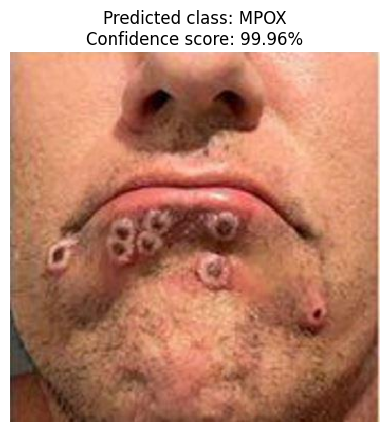

('MPOX', 99.96)

In [ ]:
image_path = './test/MPOX/Moneypox_1185.jpg'
mpox_predict(image_path, mpox_model, mpox_model_class_names, IMAGE_SIZE)

1/1 [==============================] - 2s 2s/step


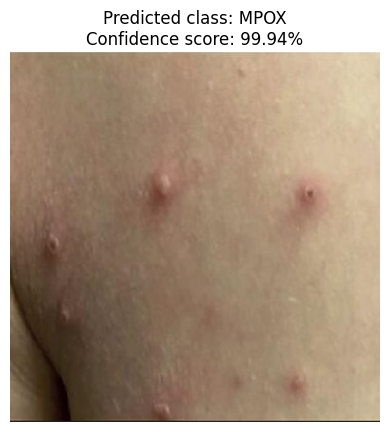

('MPOX', 99.94)

In [ ]:
# path to your image
image_path = './test/MPOX/Moneypox_639.jpg'
mpox_predict(image_path, mpox_model, mpox_model_class_names, IMAGE_SIZE)

1/1 [==============================] - 3s 3s/step


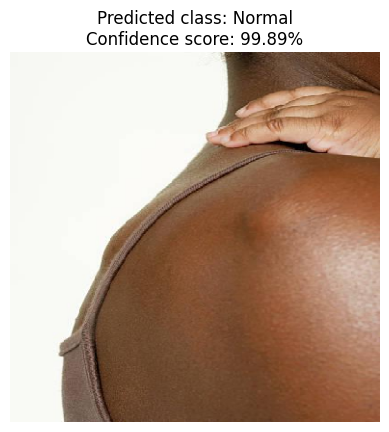

('Normal', 99.89)

In [ ]:
# path to your image
image_path = './test/Normal/Normal skin_1240.jpg'
mpox_predict(image_path, mpox_model, mpox_model_class_names, IMAGE_SIZE)

1/1 [==============================] - 4s 4s/step


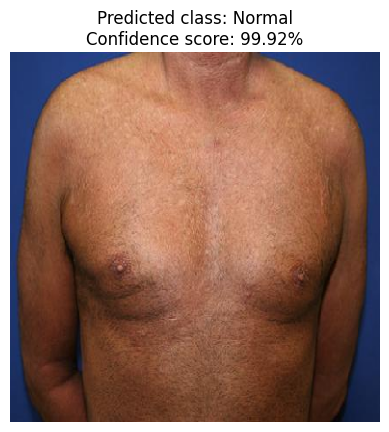

('Normal', 99.92)

In [ ]:
# path to your image
image_path = './test/Normal/Normal skin_77.jpg'
mpox_predict(image_path, mpox_model, mpox_model_class_names, IMAGE_SIZE)

1/1 [==============================] - 2s 2s/step


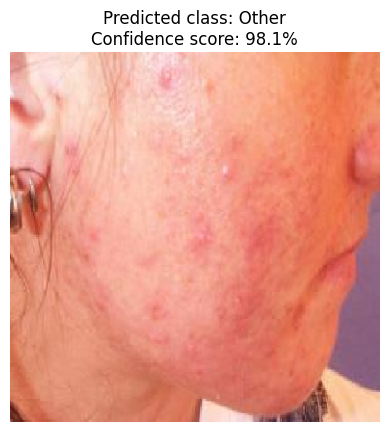

('Other', 98.1)

In [ ]:
# path to your image
image_path = './test/Other/Other Skin Issues_115.jpg'
mpox_predict(image_path, mpox_model, mpox_model_class_names, IMAGE_SIZE)

1/1 [==============================] - 4s 4s/step


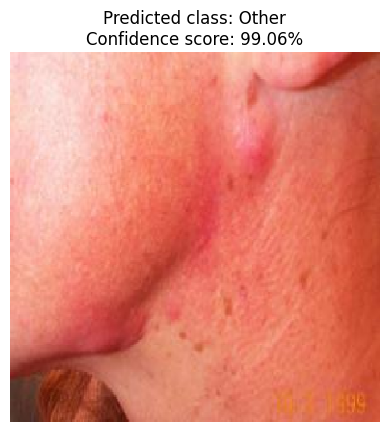

('Other', 99.06)

In [ ]:
# path to your image
image_path = './test/Other/Other Skin Issues_117.jpg'
mpox_predict(image_path, mpox_model, mpox_model_class_names, IMAGE_SIZE)